<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
C:\Users\reshm\AppData\Local\Temp\ipykernel_26748\307270687.py:10: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("d:\DTD\Project\Dataset\Data transformation.csv")


Model A (with outliers):
  R2: 0.9489865334314078
RMSE: 9707.479944022698

Model B (without outliers):
  R2: 0.9489865334314078
RMSE: 9707.479944022698


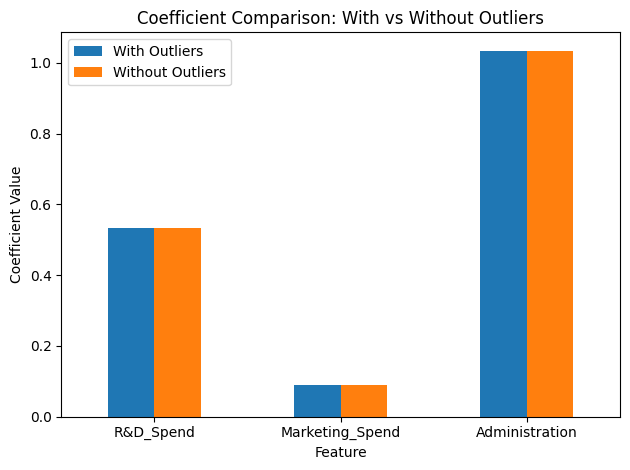

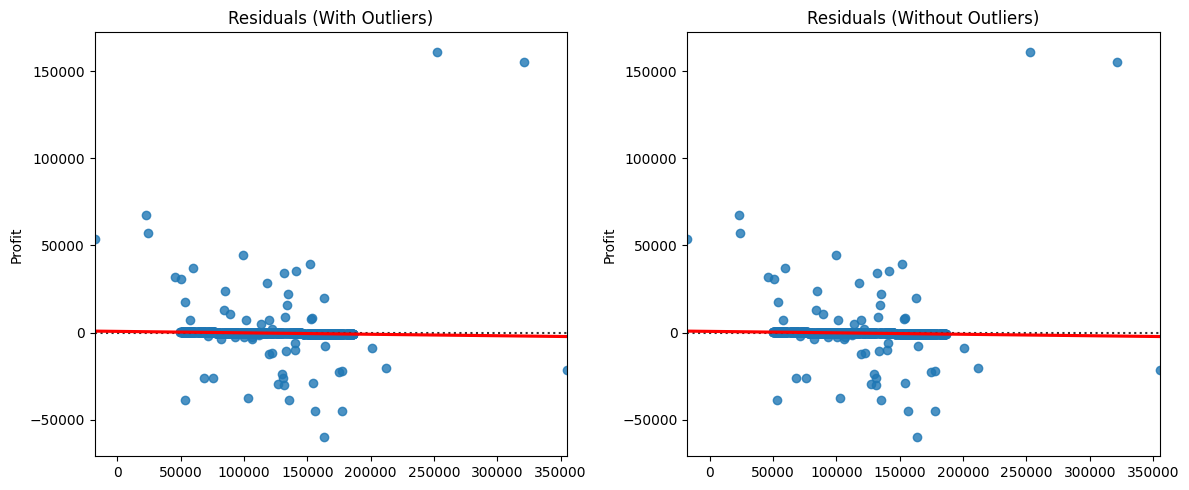

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import zscore

# --- Step 1: Load Data ---
df = pd.read_csv("d:\DTD\Project\Dataset\Data transformation.csv")

# --- Step 2: Detect Outliers (Z-score method) ---
df['zscore'] = zscore(df['Total_Spend'])   # replace 'Spend' with your key numeric column
outlier_mask = np.abs(df['zscore']) > 3

# --- Step 3: Split Data ---
X = df[['R&D_Spend','Marketing_Spend','Administration']]   # adjust features
y = df['Profit']

X_clean = X[~outlier_mask]
y_clean = y[~outlier_mask]

# --- Step 4: Train Models ---
model_a = LinearRegression().fit(X, y)          # with outliers
model_b = LinearRegression().fit(X_clean, y_clean)  # without outliers

pred_a = model_a.predict(X)
pred_b = model_b.predict(X_clean)

# --- Step 5: Compare Metrics ---

print("Model A (with outliers):")
print("  R2:", r2_score(y, pred_a))
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y, pred_a))
print("RMSE:", rmse)


print("\nModel B (without outliers):")
print("  R2:", r2_score(y_clean, pred_b))
rmse_clean = np.sqrt(mean_squared_error(y_clean, pred_b))
print("RMSE:", rmse_clean)
# --- Step 6: Visualize Coefficients ---
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'With Outliers': model_a.coef_,
    'Without Outliers': model_b.coef_
})

coeffs.plot(x='Feature', kind='bar')
plt.title("Coefficient Comparison: With vs Without Outliers")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- Step 7: Residual Plots ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.residplot(x=pred_a, y=y, lowess=True, ax=axes[0], line_kws={'color':'red'})
axes[0].set_title("Residuals (With Outliers)")

sns.residplot(x=pred_b, y=y_clean, lowess=True, ax=axes[1], line_kws={'color':'red'})
axes[1].set_title("Residuals (Without Outliers)")

plt.tight_layout()
plt.show()